In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data set

ds = pd.read_csv('50_startups.csv')

In [3]:
# To Display the top 5 observations.

ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# To check the categories of categorical variable.

ds['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

The categorical variable State is a nominal variable. This categorical variable will be converted into binary vector using OneHotEncoder method.

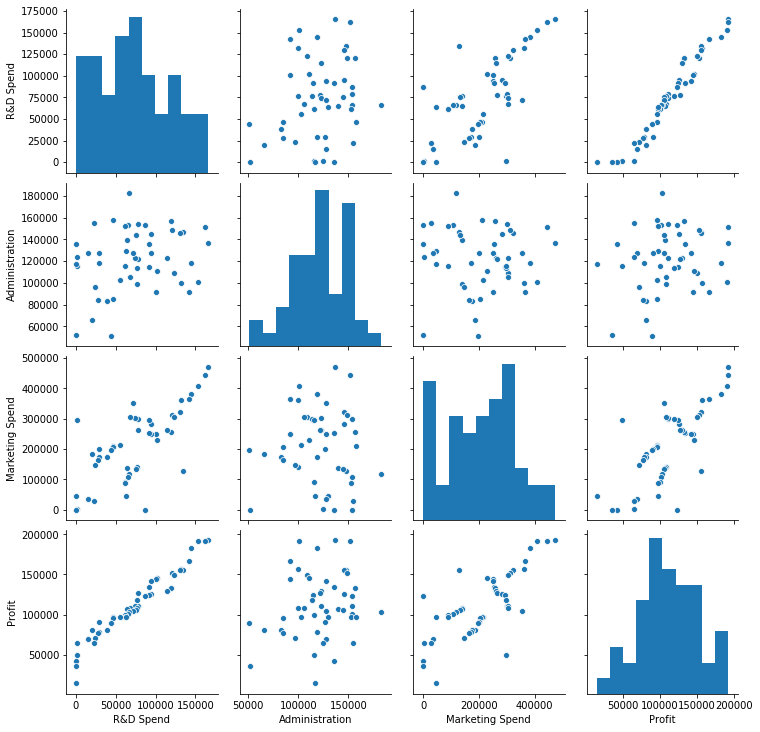

In [5]:
# Visualising the scatter plots of all the possible pairs except categorical variable to understand the relationship between variables.

sns.pairplot(ds) # does not display categorical variable.

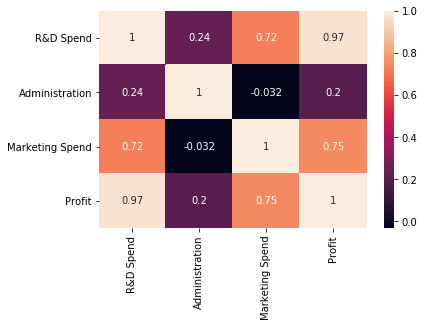

In [6]:
# To visulaise the strength of correlation between continuous variables

sns.heatmap(ds.corr(), annot = True)

In [7]:
# Define matrix of independent variables as X and dependent variable as y.

X = ds.iloc[:,:-1].values
y = ds.iloc[:, -1].values

In [8]:
# Encoding the categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')

In [9]:
# Transform the categorical variable and convert it into an array

X = np.array(ct.fit_transform(X))

In [10]:
# To check the dimensions of X and Y

X.shape, y.shape

((50, 6), (50,))

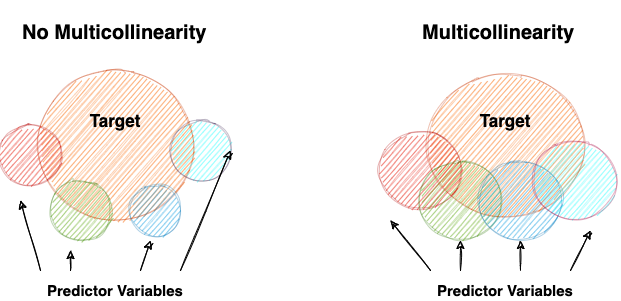

In [11]:
# dropping the first column to avoid the dummy variable trap. 

X = X[:, 1:] 

In [12]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [13]:
#Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Fitting a MLR for predicting profit

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# model coefficients

coe1 = print('regression coefficients:', mlr.coef_)
int1 = print('intercept:', mlr.intercept_)

regression coefficients: [-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
intercept: 42554.16761772438


In [16]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [17]:
# predicting the test results

ypred = mlr.predict(X_test)

pd.DataFrame([y_test, ypred, y_test-ypred])  # Refer "https://newbedev.com/valueerror-shape-of-passed-values-is-1-6-indices-imply-6-6"

,0,1,2,3,4,5,6,7,8,9
0,103282.380000,144259.400000,146121.950000,77798.830000,191050.390000,105008.310000,81229.060000,97483.560000,110352.25000,166187.940000
1,103015.201598,132582.277608,132447.738452,71976.098513,178537.482211,116161.242302,67851.692097,98791.733747,113969.43533,167921.065696
2,267.178402,11677.122392,13674.211548,5822.731487,12512.907789,-11152.932302,13377.367903,-1308.173747,-3617.18533,-1733.125696


In [18]:
# model score

mlr.score(X_test, y_test) # Also try the equivalent measure from sklearn.metrics import r2_score,  r2_score(y_test, ypred)


0.9347068473282446

About 93.47% of the variation is known from this model. 

The model can be fine tuned either by fitting other methods or omitting administration as it is not significantly correlated with profit.

In [19]:
# Let k be the number of independent varaibles. Here k = 5. 

#Adjusted R-squared value

ar2 = 1 - ((( 1- mlr.score(X_test, y_test) ) * ( len(y) - 1 )) / ( len(y) - 5 - 1 ))
ar2

0.9272871708882724

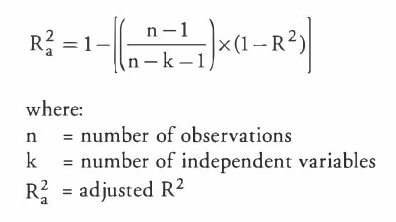

Image credits:"https://medium.com/analytics-vidhya/adjusted-r-squared-formula-explanation-1ce033e25699"

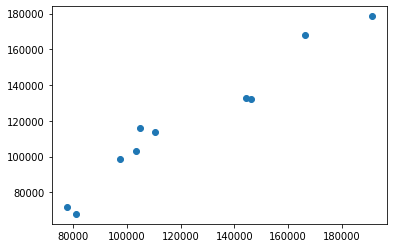

In [20]:
# Visualise the predicted results.

plt.scatter(y_test, ypred)

Observe that the values are nearly linear indicating that the linear model is a best fit in predicting the profit.

In [21]:
# How to predict the value using teh fitted model for new observation?

ynew = mlr.predict([X_test[1]])


In [22]:
ynew

array([132582.27760815])

In [23]:
y_test[1]-ynew

array([11677.12239185])

# Regression 2

This is to test whether the model perform better without Administration

In [24]:
# Define dataset with different object name to keep it simple

ds1 = pd.read_csv('50_startups.csv')

In [25]:
ds1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
# dropping Adminstration
ds1.drop(labels = 'Administration', axis = 1, inplace = True)

# or use the location of column as
# ds1.drop(df.columns[[1]], axis = 1, inplace = True)

In [27]:
ds1.head()

,R&D Spend,Marketing Spend,State,Profit
0,165349.20,471784.10,New York,192261.83
1,162597.70,443898.53,California,191792.06
2,153441.51,407934.54,Florida,191050.39
3,144372.41,383199.62,New York,182901.99
4,142107.34,366168.42,Florida,166187.94


In [28]:
# Let us remove administration

X1 = ds1.iloc[:,:-1].values
y1 = ds1.iloc[:, -1].values


In [29]:
X1

array([[165349.2, 471784.1, 'New York'],
       [162597.7, 443898.53, 'California'],
       [153441.51, 407934.54, 'Florida'],
       [144372.41, 383199.62, 'New York'],
       [142107.34, 366168.42, 'Florida'],
       [131876.9, 362861.36, 'New York'],
       [134615.46, 127716.82, 'California'],
       [130298.13, 323876.68, 'Florida'],
       [120542.52, 311613.29, 'New York'],
       [123334.88, 304981.62, 'California'],
       [101913.08, 229160.95, 'Florida'],
       [100671.96, 249744.55, 'California'],
       [93863.75, 249839.44, 'Florida'],
       [91992.39, 252664.93, 'California'],
       [119943.24, 256512.92, 'Florida'],
       [114523.61, 261776.23, 'New York'],
       [78013.11, 264346.06, 'California'],
       [94657.16, 282574.31, 'New York'],
       [91749.16, 294919.57, 'Florida'],
       [86419.7, 0.0, 'New York'],
       [76253.86, 298664.47, 'California'],
       [78389.47, 299737.29, 'New York'],
       [73994.56, 303319.26, 'Florida'],
       [67532.53, 304768.

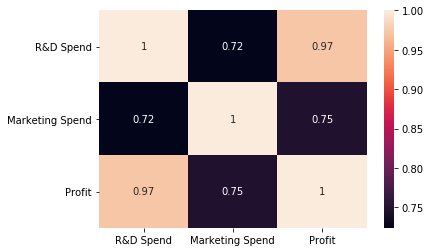

In [30]:
#visulising the correlations between variables

sns.heatmap(ds1.corr(), annot = True)

Both the independent variables have significant correlation with Profit.

In [31]:
# Encoding the categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')

In [32]:
X1 = np.array(ct2.fit_transform(X1))

In [33]:
X1

array([[0.0, 0.0, 1.0, 165349.2, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 282574.31],
       [0.0, 1.0, 0.0, 91749.16, 294919.57],
       [0.0, 0.0, 1.0, 86419.7, 0.0],
       [1.0, 0.0, 0.0, 76253.86, 298664.47],
       [0.0, 0.0, 1.0, 78389.47, 299737.29],
       

In [34]:
X1 = X1[:,1:] # avoid Dummy variable trap

In [35]:
# Training the model for training set

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [36]:
#Checking the spliting method
# refer  "https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/"
pd.DataFrame(y_test, y1_test)

,0
103282.38,103282.38
144259.40,144259.40
146121.95,146121.95
77798.83,77798.83
191050.39,191050.39
105008.31,105008.31
81229.06,81229.06
97483.56,97483.56
110352.25,110352.25
166187.94,166187.94


The spliting is similar. 
There are many different types in splitting

Refer to "https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/"

In [37]:
#Fitting the model 

mlr.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# the model coefficients

print('regression coefficients:', mlr.coef_)
print('intercept:', mlr.intercept_)

regression coefficients: [-8.26468159e+02  5.54657333e+02  7.85141717e-01  3.39564023e-02]
intercept: 46329.060178561056


Observe that the estimated coefficients have changed from before.

In [39]:
# predicting the test results and comparing with previous regression

ypred1 = mlr.predict(X1_test)
pd.DataFrame([y_test, ypred, y_test - ypred, ypred1, y_test-ypred1])

,0,1,2,3,4,5,6,7,8,9
0,103282.380000,144259.400000,146121.950000,77798.830000,191050.390000,105008.310000,81229.060000,97483.560000,110352.25000,166187.940000
1,103015.201598,132582.277608,132447.738452,71976.098513,178537.482211,116161.242302,67851.692097,98791.733747,113969.43533,167921.065696
2,267.178402,11677.122392,13674.211548,5822.731487,12512.907789,-11152.932302,13377.367903,-1308.173747,-3617.18533,-1733.125696
3,101374.283679,133851.242160,133300.284086,72987.320731,179827.912057,115491.253959,69057.748820,97880.013606,113898.43876,169510.755184
4,1908.096321,10408.157840,12821.665914,4811.509269,11222.477943,-10482.943959,12171.311180,-396.453606,-3546.18876,-3322.815184


In [40]:
# the score value to access the model

rr = mlr.score(X1_test, y_test)
rr

0.9446968769427246

We can see that the Regression2 has fit model well than first model.

ThinK! Is it a overfitting?

Think about the goal of the project! 

Does the Administration spend can be neglected? This should answer the performance of this model!

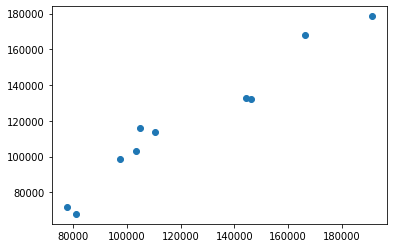

In [41]:
# Visualising the model results

plt.scatter(y_test, ypred)

In [42]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [43]:
y1 = mlr.predict(X1_test[[1]])


In [44]:
y1

array([133851.24216011])

In [45]:
y_test[1]- y1

array([10408.15783989])

In [48]:
y_test[1] - ynew

array([11677.12239185])

In [ ]:
Thus, we can say that Regression 2 is better fit than one.